# Fidelity of alast traing set

Fidelity look Clements fidelity

I think it woroks just for UNITARY MATRIX LOL

In [1]:
import os
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def extract_target_pred(directory):
    # Extract prediction and target from all the models
    target_tuples = []
    prediction_tuples = []
    # Loop through each file in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)       # Construct the full file path
        if os.path.isfile(file_path):       # Check if it is a file
            result_sim = np.load(file_path, allow_pickle=True)
            target_tuples.extend([(label, array) for label, array in result_sim if 'target' in label])
            prediction_tuples.extend([(label, array) for label, array in result_sim if 'predition' in label])
    return target_tuples, prediction_tuples

In [3]:
def remove_until_underscore(s):
    parts = s.split('_')
    result = '_'.join(parts[1:])
    return result

def fidelity(target_tuples, prediction_tuples):
    N = len(prediction_tuples[0][1])
    fidelity = []
    for i in range(len(target_tuples)):
        if remove_until_underscore(target_tuples[i][0]) == remove_until_underscore(prediction_tuples[i][0]):
            pred_conjugate_transpose = prediction_tuples[i][1].conj().T
            trace_UU0 = np.trace(np.dot(pred_conjugate_transpose, target_tuples[i][1]))
            trace_abs = np.abs(trace_UU0)
            fidelity.extend([np.square(trace_abs)/(trace_abs*N)])
        else:
            print("Capo abbiamo un problema :(")

    labels = [t[0] for t in prediction_tuples]
    fidelity_pd = pd.DataFrame({'label': labels, 'value': fidelity})
    return fidelity_pd

In [4]:
# def models_minvalue_mean_devstd(df, name_models):
#     # Extracting the base label (e.g., 'LabelA', 'LabelB')
#     df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0])
#     # Group with the base label and find min
#     min_value_s = df.groupby('label_no_rep')['value'].min()

#     mean_models= []
#     std_dev_models =[]
#     for name in name_models:
#         # take the same model 
#         model_s = min_value_s[min_value_s.index.str.contains(name)]
#         mean_models.append(model_s.mean())
#         std_dev_models.append(model_s.std())
    
#     return mean_models, std_dev_models

In [5]:
def models_maxvalue_mean_devstd(df, name_models):
    # Extracting the base label (e.g., 'LabelA', 'LabelB')
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0])
    # Group with the base label and find min
    max_value_s = df.groupby('label_no_rep')['value'].max()

    mean_models= []
    std_dev_models =[]
    for name in name_models:
        # take the same model 
        model_s = max_value_s[max_value_s.index.str.contains(name)]
        mean_models.append(model_s.mean())
        std_dev_models.append(model_s.std())
    
    return mean_models, std_dev_models

## N = 4

In [6]:
directory = '20240420_N4_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN',
            'NEUROPULSBonus_anymatrixNxN', 'NEUROPULSBonus_Bell_Minht_NxN', 'NEUROPULSBonus_BellNormal_NxN',
            'CB_withMZI', 'FB_withMZI', 'FBH_withMZI', 'NPBU_withMZI',]

target_tuples, prediction_tuples = extract_target_pred(directory)
fidelity_pd = fidelity(target_tuples, prediction_tuples)
mean_models, std_dev_models = models_maxvalue_mean_devstd(fidelity_pd, name_models)

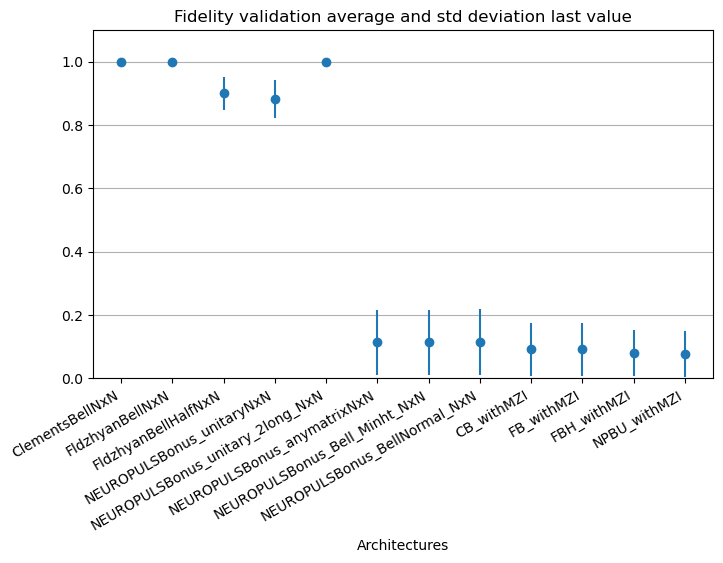

In [7]:
fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
# for i in range(len(name_models)):
#     plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
#     plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Fidelity validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 1.1])
plt.grid(axis='y')
plt.savefig("Test" + ".png", dpi=399)
plt.show();

In [8]:
results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

,label,average_value,std_dev_value
0,ClementsBellNxN,1.000000,2.284310e-08
1,FldzhyanBellNxN,1.000000,2.845429e-08
2,FldzhyanBellHalfNxN,0.901319,5.229680e-02
3,NEUROPULSBonus_unitaryNxN,0.882805,6.136618e-02
4,NEUROPULSBonus_unitary_2long_NxN,1.000000,2.503239e-08
5,NEUROPULSBonus_anymatrixNxN,0.113645,1.032375e-01
6,NEUROPULSBonus_Bell_Minht_NxN,0.113645,1.032375e-01
7,NEUROPULSBonus_BellNormal_NxN,0.113788,1.038216e-01
8,CB_withMZI,0.091656,8.452019e-02
9,FB_withMZI,0.091656,8.452017e-02


## N = 8

In [9]:
directory = '20240420_N8_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN',
            'NEUROPULSBonus_anymatrixNxN', 'NEUROPULSBonus_Bell_Minht_NxN', 'NEUROPULSBonus_BellNormal_NxN',
            'CB_withMZI', 'FB_withMZI', 'FBH_withMZI', 'NPBU_withMZI',]

target_tuples, prediction_tuples = extract_target_pred(directory)
fidelity_pd = fidelity(target_tuples, prediction_tuples)
mean_models, std_dev_models = models_maxvalue_mean_devstd(fidelity_pd, name_models)

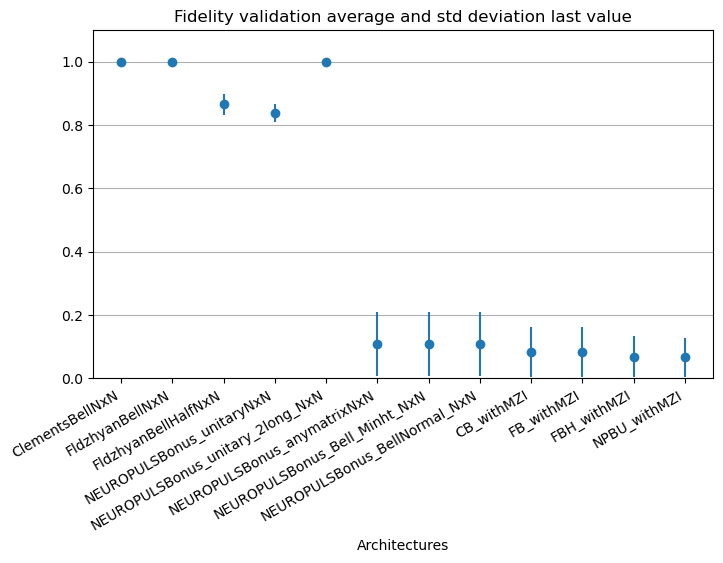

In [10]:
fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
# for i in range(len(name_models)):
#     plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
#     plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Fidelity validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 1.1])
plt.grid(axis='y')
plt.savefig("Test" + ".png", dpi=399)
plt.show();

In [11]:
results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

,label,average_value,std_dev_value
0,ClementsBellNxN,1.000000,4.691291e-07
1,FldzhyanBellNxN,0.999998,1.069211e-05
2,FldzhyanBellHalfNxN,0.865834,3.391084e-02
3,NEUROPULSBonus_unitaryNxN,0.838014,2.944482e-02
4,NEUROPULSBonus_unitary_2long_NxN,1.000000,2.339220e-08
5,NEUROPULSBonus_anymatrixNxN,0.108829,1.008193e-01
6,NEUROPULSBonus_Bell_Minht_NxN,0.108831,1.008453e-01
7,NEUROPULSBonus_BellNormal_NxN,0.108810,1.009150e-01
8,CB_withMZI,0.083450,7.792960e-02
9,FB_withMZI,0.083449,7.792925e-02


## N = 16

In [12]:
directory = '20240420_N16_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN',
            'NEUROPULSBonus_anymatrixNxN', 'NEUROPULSBonus_Bell_Minht_NxN', 'NEUROPULSBonus_BellNormal_NxN',
            'CB_withMZI', 'FB_withMZI', 'FBH_withMZI', 'NPBU_withMZI',]

target_tuples, prediction_tuples = extract_target_pred(directory)
fidelity_pd = fidelity(target_tuples, prediction_tuples)
mean_models, std_dev_models = models_maxvalue_mean_devstd(fidelity_pd, name_models)

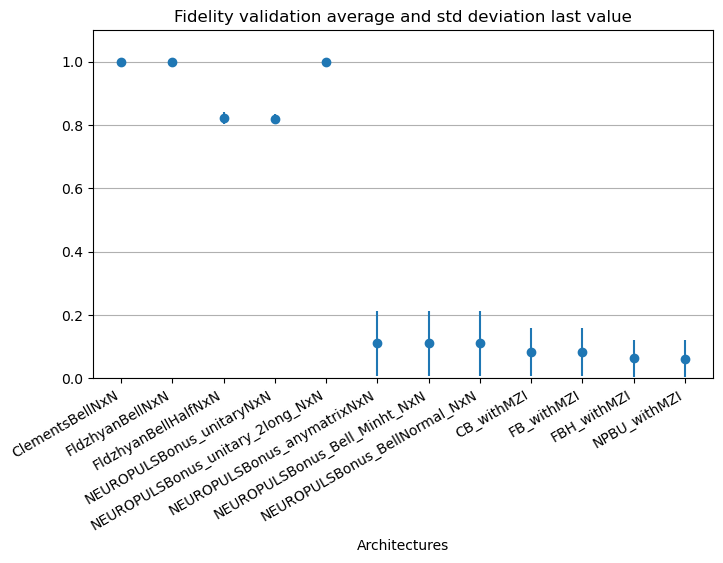

In [13]:
fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
# for i in range(len(name_models)):
#     plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
#     plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Fidelity validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 1.1])
plt.grid(axis='y')
plt.savefig("Test" + ".png", dpi=399)
plt.show();

In [14]:
results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

,label,average_value,std_dev_value
0,ClementsBellNxN,0.999791,0.000135
1,FldzhyanBellNxN,0.999491,0.000219
2,FldzhyanBellHalfNxN,0.822988,0.018106
3,NEUROPULSBonus_unitaryNxN,0.819594,0.014334
4,NEUROPULSBonus_unitary_2long_NxN,0.999961,0.000017
5,NEUROPULSBonus_anymatrixNxN,0.110592,0.102191
6,NEUROPULSBonus_Bell_Minht_NxN,0.110605,0.102154
7,NEUROPULSBonus_BellNormal_NxN,0.110507,0.102112
8,CB_withMZI,0.082658,0.076711
9,FB_withMZI,0.082597,0.076658


# Cosine similarity

This thime we use the Frobenious product to derive the cosine between the two complex matrix
The cosine similarity between matrices \(A\) and \(B\) is given by:

$$
\text{cosine similarity} = \frac{\text{Re}(\text{trace}(A^H B))}{\|A\|_F \|B\|_F}
$$

where:
- \(A^H\) is the conjugate transpose of \(A\),
- \(\text{Re}(\cdot)\) denotes taking the real part of the complex number,
- \(\|A\|_F\) and \(\|B\|_F\) are the Frobenius norms of \(A\) and \(B\), respectively.

In [15]:
def cosine_similarity(target_tuples, prediction_tuples):
    cosine_similarity = []
    for i in range(len(target_tuples)):
        if remove_until_underscore(target_tuples[i][0]) == remove_until_underscore(prediction_tuples[i][0]):
            U = prediction_tuples[i][1]
            UH = U.conj().T
            U0 = target_tuples[i][1]
            U0H = U0.conj().T
            trace_UH_U0 = np.trace(np.dot(UH, U0)).real         # !!!!!!!!!!!!! CAREFULL !!!!!!!!!!!!!!!!!!!!
            trace_UH_U = np.trace(np.dot(UH, U)).real
            trace_U0H_U0 = np.trace(np.dot(U0H, U0)).real
            cosine_similarity.extend([trace_UH_U0/np.sqrt(trace_UH_U*trace_U0H_U0)])
        else:
            print("Capo abbiamo un problema :(")

    labels = [t[0] for t in prediction_tuples]
    cosine_similarity_pd = pd.DataFrame({'label': labels, 'value': cosine_similarity})
    return cosine_similarity_pd

## N = 4

In [16]:
directory = '20240420_N4_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN',
            'NEUROPULSBonus_anymatrixNxN', 'NEUROPULSBonus_Bell_Minht_NxN', 'NEUROPULSBonus_BellNormal_NxN',
            'CB_withMZI', 'FB_withMZI', 'FBH_withMZI', 'NPBU_withMZI',]

target_tuples, prediction_tuples = extract_target_pred(directory)
cosine_similarity_pd = cosine_similarity(target_tuples, prediction_tuples)
mean_models, std_dev_models = models_maxvalue_mean_devstd(cosine_similarity_pd, name_models)

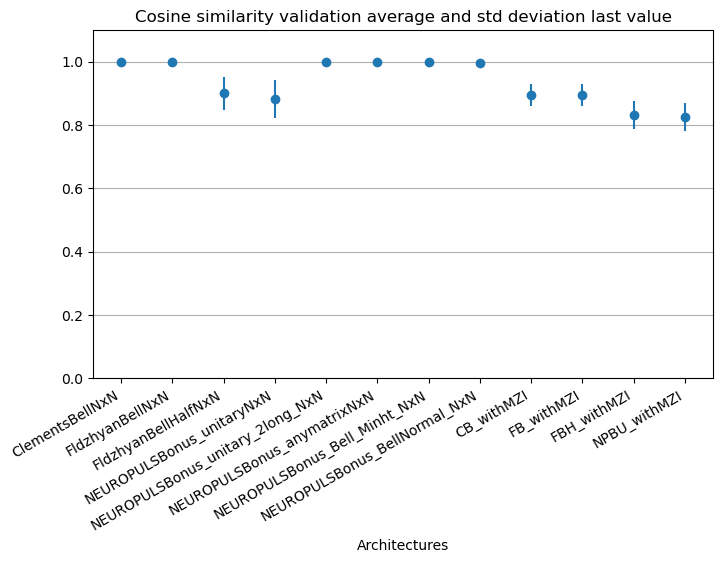

In [17]:
fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
# for i in range(len(name_models)):
#     plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
#     plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Cosine similarity validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 1.1])
plt.grid(axis='y')
plt.savefig("Test" + ".png", dpi=399)
plt.show();

In [18]:
results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

,label,average_value,std_dev_value
0,ClementsBellNxN,1.000000,8.361842e-09
1,FldzhyanBellNxN,1.000000,1.050308e-08
2,FldzhyanBellHalfNxN,0.901319,5.229680e-02
3,NEUROPULSBonus_unitaryNxN,0.882805,6.136618e-02
4,NEUROPULSBonus_unitary_2long_NxN,1.000000,8.390635e-09
5,NEUROPULSBonus_anymatrixNxN,0.999354,4.948153e-03
6,NEUROPULSBonus_Bell_Minht_NxN,0.999035,6.086149e-03
7,NEUROPULSBonus_BellNormal_NxN,0.995871,7.017658e-03
8,CB_withMZI,0.895703,3.444849e-02
9,FB_withMZI,0.895705,3.444956e-02


## N = 8

In [19]:
directory = '20240420_N8_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN',
            'NEUROPULSBonus_anymatrixNxN', 'NEUROPULSBonus_Bell_Minht_NxN', 'NEUROPULSBonus_BellNormal_NxN',
            'CB_withMZI', 'FB_withMZI', 'FBH_withMZI', 'NPBU_withMZI',]

target_tuples, prediction_tuples = extract_target_pred(directory)
cosine_similarity_pd = cosine_similarity(target_tuples, prediction_tuples)
mean_models, std_dev_models = models_maxvalue_mean_devstd(cosine_similarity_pd, name_models)

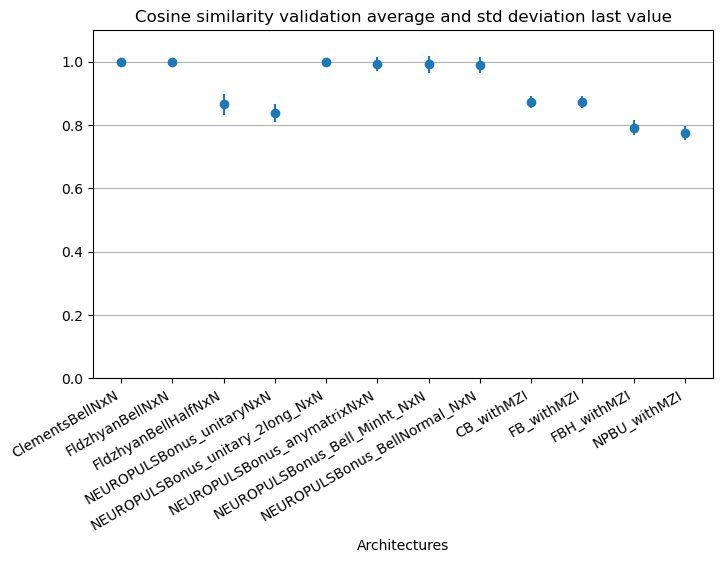

In [20]:
fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
# for i in range(len(name_models)):
#     plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
#     plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Cosine similarity validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 1.1])
plt.grid(axis='y')
plt.savefig("Test" + ".png", dpi=399)
plt.show();

In [21]:
results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

,label,average_value,std_dev_value
0,ClementsBellNxN,1.000000,4.670707e-07
1,FldzhyanBellNxN,0.999998,1.068983e-05
2,FldzhyanBellHalfNxN,0.865834,3.391084e-02
3,NEUROPULSBonus_unitaryNxN,0.838014,2.944482e-02
4,NEUROPULSBonus_unitary_2long_NxN,1.000000,9.850400e-09
5,NEUROPULSBonus_anymatrixNxN,0.993456,2.214995e-02
6,NEUROPULSBonus_Bell_Minht_NxN,0.991952,2.662679e-02
7,NEUROPULSBonus_BellNormal_NxN,0.991130,2.588695e-02
8,CB_withMZI,0.873278,1.915279e-02
9,FB_withMZI,0.873357,1.890715e-02


## N = 16

In [22]:
directory = '20240420_N16_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN',
            'NEUROPULSBonus_anymatrixNxN', 'NEUROPULSBonus_Bell_Minht_NxN', 'NEUROPULSBonus_BellNormal_NxN',
            'CB_withMZI', 'FB_withMZI', 'FBH_withMZI', 'NPBU_withMZI',]

target_tuples, prediction_tuples = extract_target_pred(directory)
cosine_similarity_pd = cosine_similarity(target_tuples, prediction_tuples)
mean_models, std_dev_models = models_maxvalue_mean_devstd(cosine_similarity_pd, name_models)

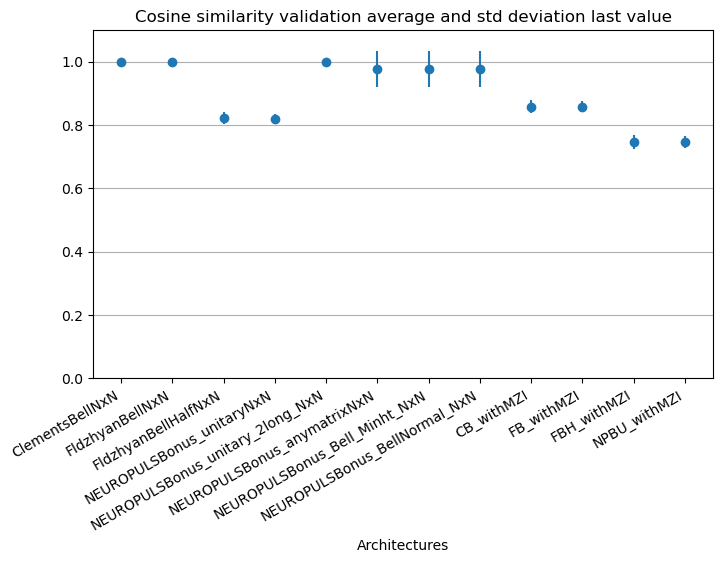

In [23]:
fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
# for i in range(len(name_models)):
#     plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
#     plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Cosine similarity validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 1.1])
plt.grid(axis='y')
plt.savefig("Test" + ".png", dpi=399)
plt.show();

In [24]:
results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

,label,average_value,std_dev_value
0,ClementsBellNxN,0.999791,0.000135
1,FldzhyanBellNxN,0.999492,0.000219
2,FldzhyanBellHalfNxN,0.822988,0.018106
3,NEUROPULSBonus_unitaryNxN,0.819594,0.014334
4,NEUROPULSBonus_unitary_2long_NxN,0.999962,0.000017
5,NEUROPULSBonus_anymatrixNxN,0.977577,0.055673
6,NEUROPULSBonus_Bell_Minht_NxN,0.977987,0.058107
7,NEUROPULSBonus_BellNormal_NxN,0.977846,0.056382
8,CB_withMZI,0.858728,0.020792
9,FB_withMZI,0.858880,0.017718
